In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
sb.set()

In [30]:
DF = pd.read_csv('cleaned_dataset_post_EDA.csv')

# Machine Learning Models

## Regression

### Preparing the DataFrame

In [31]:
DF.dropna(inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233772 entries, 0 to 233771
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         233772 non-null  int64  
 1   Time_Hour_TS       233772 non-null  object 
 2   Airline            233772 non-null  object 
 3   Flight_Number      233772 non-null  int64  
 4   Tail_Number        233772 non-null  object 
 5   Departure_Time     233772 non-null  object 
 6   Departure_Delay    233772 non-null  float64
 7   Arrival_Time       233772 non-null  object 
 8   Arrival_Delay      233772 non-null  float64
 9   Origin             233772 non-null  object 
 10  Destination        233772 non-null  object 
 11  Flight_Distance    233772 non-null  int64  
 12  Flight_Duration    233772 non-null  float64
 13  Aircraft_Type      233772 non-null  object 
 14  Model              233772 non-null  object 
 15  Year_Manufactured  233772 non-null  float64
 16  Ma

In [93]:
DF_clean = DF
DF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233772 entries, 0 to 233771
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         233772 non-null  int64  
 1   Time_Hour_TS       233772 non-null  object 
 2   Airline            233772 non-null  object 
 3   Flight_Number      233772 non-null  int64  
 4   Tail_Number        233772 non-null  object 
 5   Departure_Time     233772 non-null  object 
 6   Departure_Delay    233772 non-null  float64
 7   Arrival_Time       233772 non-null  object 
 8   Arrival_Delay      233772 non-null  float64
 9   Origin             233772 non-null  object 
 10  Destination        233772 non-null  object 
 11  Flight_Distance    233772 non-null  int64  
 12  Flight_Duration    233772 non-null  float64
 13  Aircraft_Type      233772 non-null  object 
 14  Model              233772 non-null  object 
 15  Year_Manufactured  233772 non-null  float64
 16  Ma

Since our dataset contains negative Departure Delays (The flight departed before its scheduled departure) and more than half the dataset has Departure Delay = 0 we decided to use only the points which have Departure Delay > 0 for a better fit on our reggresion models

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

catvars = DF_clean[['Airline','Manufacturer','Origin','Engine_Type']]
enc.fit(catvars)
catvars_enc = pd.DataFrame(enc.transform(catvars).toarray(), 
columns=enc.get_feature_names(catvars.columns))

catvars_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233772 entries, 0 to 233771
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Airline_AirTran Airways Corporation         233772 non-null  float64
 1   Airline_American Airlines Inc.              233772 non-null  float64
 2   Airline_Delta Air Lines Inc.                233772 non-null  float64
 3   Airline_Endeavor Air Inc.                   233772 non-null  float64
 4   Airline_ExpressJet Airlines Inc.            233772 non-null  float64
 5   Airline_JetBlue Airways                     233772 non-null  float64
 6   Airline_Southwest Airlines Co.              233772 non-null  float64
 7   Airline_US Airways Inc.                     233772 non-null  float64
 8   Airline_United Air Lines Inc.               233772 non-null  float64
 9   Airline_Virgin America                      233772 non-null  float64
 

/home/NIHALARY001/CZ1016/base/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


OneHotEncoding all the categorical variables so that they can be passed into our models

In [95]:
catvars_enc.head()

,Airline_AirTran Airways Corporation,Airline_American Airlines Inc.,Airline_Delta Air Lines Inc.,Airline_Endeavor Air Inc.,Airline_ExpressJet Airlines Inc.,Airline_JetBlue Airways,Airline_Southwest Airlines Co.,Airline_US Airways Inc.,Airline_United Air Lines Inc.,Airline_Virgin America,...,Manufacturer_BOEING,Manufacturer_BOMBARDIER INC,Manufacturer_CANADAIR,Manufacturer_EMBRAER,Manufacturer_MCDONNELL DOUGLAS CORPORATION,Origin_EWR,Origin_JFK,Origin_LGA,Engine_Type_Turbo-fan,Engine_Type_Turbo-jet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [96]:
numvar = pd.DataFrame(DF_clean[["Temperature","Humidity",'Pressure','Wind_Speed','Precipitation','Day','Hour','Visibility','Seats']])
numvar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233772 entries, 0 to 233771
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Temperature    233772 non-null  float64
 1   Humidity       233772 non-null  float64
 2   Pressure       233772 non-null  float64
 3   Wind_Speed     233772 non-null  float64
 4   Precipitation  233772 non-null  float64
 5   Day            233772 non-null  int64  
 6   Hour           233772 non-null  int64  
 7   Visibility     233772 non-null  float64
 8   Seats          233772 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 25.9 MB


In [97]:
numvar = numvar.reset_index()
numvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233772 entries, 0 to 233771
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          233772 non-null  int64  
 1   Temperature    233772 non-null  float64
 2   Humidity       233772 non-null  float64
 3   Pressure       233772 non-null  float64
 4   Wind_Speed     233772 non-null  float64
 5   Precipitation  233772 non-null  float64
 6   Day            233772 non-null  int64  
 7   Hour           233772 non-null  int64  
 8   Visibility     233772 non-null  float64
 9   Seats          233772 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 17.8 MB


In [98]:
X = pd.concat([numvar,catvars_enc], axis = 1).reindex(numvar.index)
Y = DF_clean[['Departure_Delay']]

Setting our Predictor variables and Response variables

In [99]:
Y = Y.reset_index()

In [100]:
Y.info()
Y.drop(['index'], axis=1, inplace=True)
Y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233772 entries, 0 to 233771
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            233772 non-null  int64  
 1   Departure_Delay  233772 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.6 MB


,Departure_Delay
0,2.0
1,2.0
2,-1.0
3,0.0
4,4.0


In [101]:
X.info()
X.drop(['index'], axis=1, inplace=True)
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233772 entries, 0 to 233771
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       233772 non-null  int64  
 1   Temperature                                 233772 non-null  float64
 2   Humidity                                    233772 non-null  float64
 3   Pressure                                    233772 non-null  float64
 4   Wind_Speed                                  233772 non-null  float64
 5   Precipitation                               233772 non-null  float64
 6   Day                                         233772 non-null  int64  
 7   Hour                                        233772 non-null  int64  
 8   Visibility                                  233772 non-null  float64
 9   Seats                                       233772 non-null  int64  
 

,Temperature,Humidity,Pressure,Wind_Speed,Precipitation,Day,Hour,Visibility,Seats,Airline_AirTran Airways Corporation,...,Manufacturer_BOEING,Manufacturer_BOMBARDIER INC,Manufacturer_CANADAIR,Manufacturer_EMBRAER,Manufacturer_MCDONNELL DOUGLAS CORPORATION,Origin_EWR,Origin_JFK,Origin_LGA,Engine_Type_Turbo-fan,Engine_Type_Turbo-jet
0,39.02,64.43,1011.9,12.65858,0.0,1,5,10.0,149,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,39.02,61.63,1012.1,14.96014,0.0,1,5,10.0,178,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,39.02,61.63,1012.1,14.96014,0.0,1,5,10.0,200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,39.02,61.63,1012.1,14.96014,0.0,1,5,10.0,200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,39.92,54.81,1011.4,14.96014,0.0,1,5,10.0,149,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Linear Regression

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=200)

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (175329, 1) (175329, 30)
Test Set  : (58443, 1) (58443, 30)


In [103]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [104]:
print('Intercept of Regression', linreg.intercept_)
print('Coefficients of Regression', linreg.coef_)
print()

pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ['Predictors','Coefficients'])

Intercept of Regression [331.2340947]
Coefficients of Regression [[ 6.43049606e-02  2.13576879e-01 -3.51579162e-01  2.79654729e-01
   6.32225365e+01  7.12737497e-02  1.58028309e+00 -4.83670112e-01
   2.42601210e-02  4.71901997e+00 -3.40129178e+00 -4.42878245e+00
   1.24490328e+00  5.26934642e+00 -1.83520227e+00  6.40838028e+00
  -8.92076170e+00 -4.16053164e-01  1.36044142e+00 -1.28011299e+00
  -2.99915705e+00 -3.28569891e-03  2.85821465e+00  1.22907768e+00
   1.95263406e-01  8.93655158e-01 -1.24834549e+00  3.54690335e-01
   2.92466396e-02 -2.92466396e-02]]



,Predictors,Coefficients
0,Temperature,0.064305
1,Humidity,0.213577
2,Pressure,-0.351579
3,Wind_Speed,0.279655
4,Precipitation,63.222536
5,Day,0.071274
6,Hour,1.580283
7,Visibility,-0.483670
8,Seats,0.024260
9,Airline_AirTran Airways Corporation,4.719020


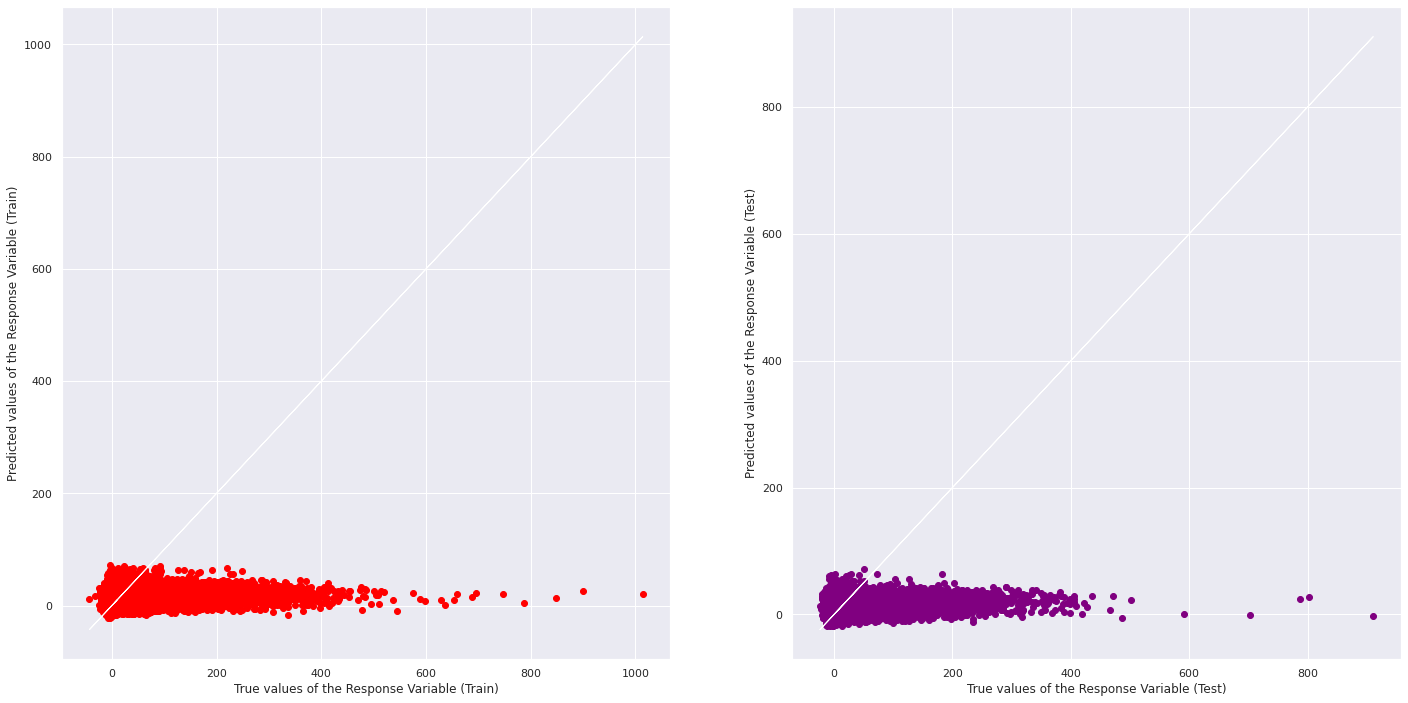

In [105]:
Y_train_pred = linreg.predict(X_train)
Y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, Y_train_pred, color = "red")
axes[0].plot(Y_train, Y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, Y_test_pred, color = "purple")
axes[1].plot(Y_test, Y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07256418858041325
Mean Squared Error (MSE) 	: 1309.9116819362275

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07349279299112099
Mean Squared Error (MSE) 	: 1328.6432774537482



### Random Forest Regressor

In [54]:
import sklearn.ensemble as ml

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=200)

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (68376, 1) (68376, 30)
Test Set  : (22793, 1) (22793, 30)


In [56]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0,max_depth = 12)

regressor.fit(X_train,Y_train.Departure_Delay.ravel())

pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ['Predictors','Coefficients'])

,Predictors,Coefficients
0,Temperature,0.130915
1,Humidity,0.316160
2,Pressure,-0.448000
3,Wind_Speed,0.289458
4,Precipitation,-3.566370
5,Day,0.059783
6,Hour,1.622020
7,Visibility,-0.516600
8,Seats,0.021228
9,Airline_AirTran Airways Corporation,6.085324


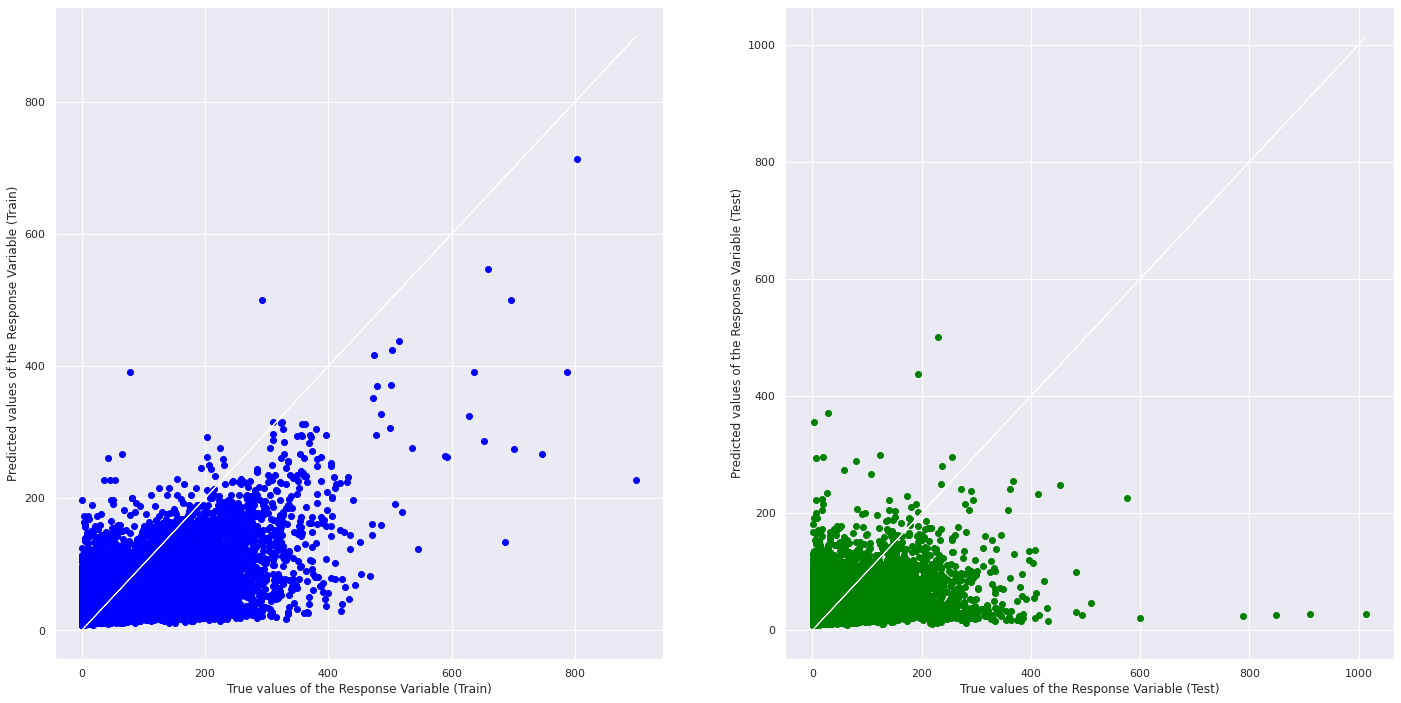

In [57]:
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, Y_train_pred, color = "blue")
axes[0].plot(Y_train, Y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, Y_test_pred, color = "green")
axes[1].plot(Y_test, Y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [58]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3817291055557537
Mean Squared Error (MSE) 	: 1608.9853436560184

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11946900476329103
Mean Squared Error (MSE) 	: 2263.420460781498



### XGBoost Regressor

In [59]:
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [107]:
import xgboost as xgb
from sklearn.metrics import r2_score

In [108]:
train_X, test_X, train_y, test_y = train_test_split(X, Y,test_size = 0.25, random_state = 200)
  
xgb_r = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 150, seed = 123)  

xgb_r.fit(train_X, train_y)
  

pred = xgb_r.predict(test_X)

train_pred = xgb_r.predict(train_X)
  

#rmse = np.sqrt(MSE(test_y, pred))
#print("RMSE : % f" %(rmse))

[18:37:38] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


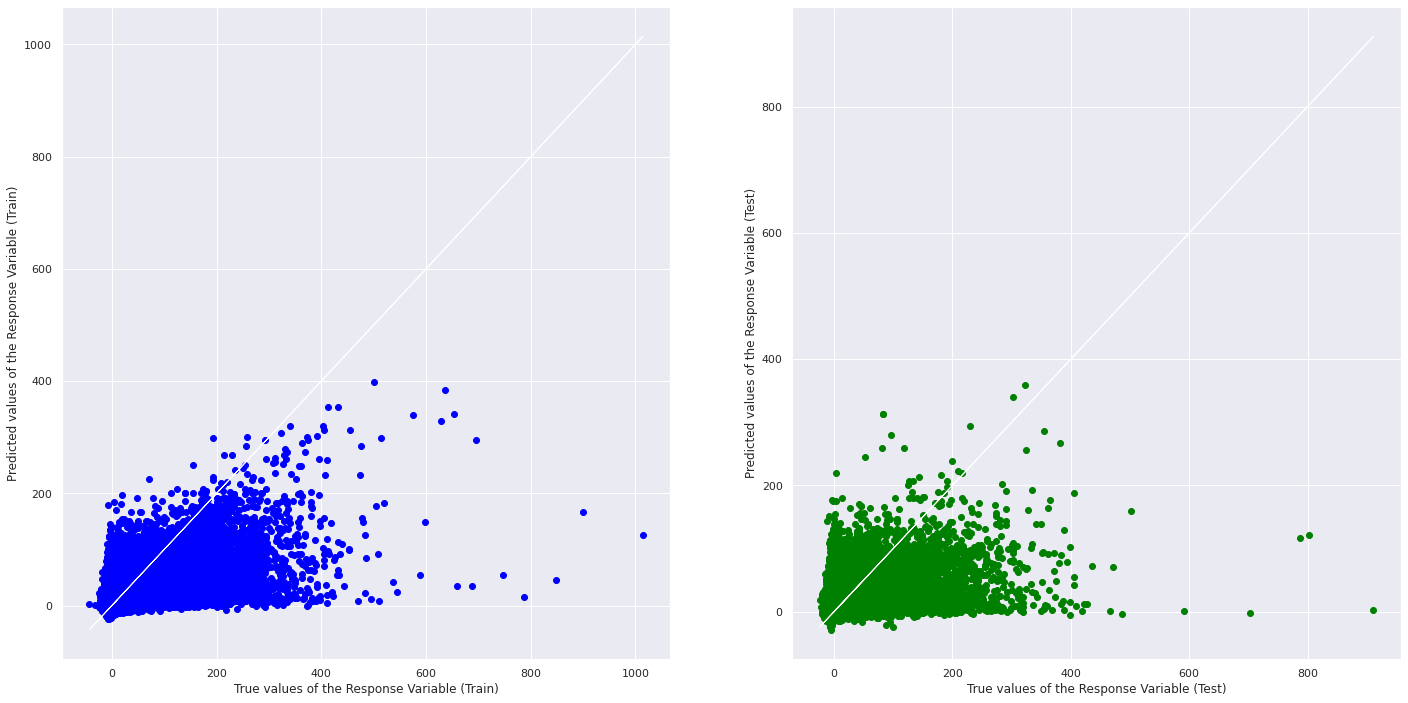

In [109]:
train_pred = xgb_r.predict(train_X)
pred = xgb_r.predict(test_X)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(train_y, train_pred, color = "blue")
axes[0].plot(train_y, train_y, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(test_y, pred, color = "green")
axes[1].plot(test_y, test_y, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [110]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(train_y,train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(test_y,pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y,pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3270433076154253
Mean Squared Error (MSE) 	: 950.485006010737

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.21870558958530573
Mean Squared Error (MSE) 	: 1120.4031207279374



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 2880x1440 with 0 Axes>

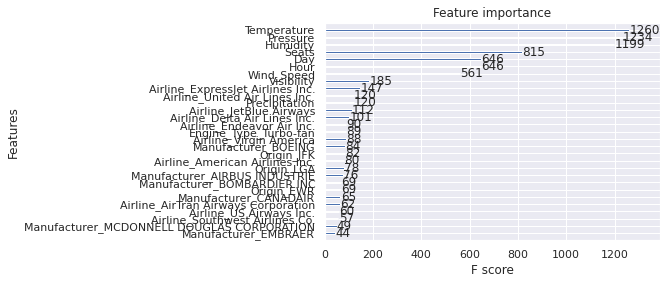

In [111]:
f = plt.figure(figsize=(40,20))
xgb.plot_importance(booster=xgb_r)

## Classification Models

### Preparing the Dataset

For classification, we have to first balance out the classes we have in the dataset

In [112]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

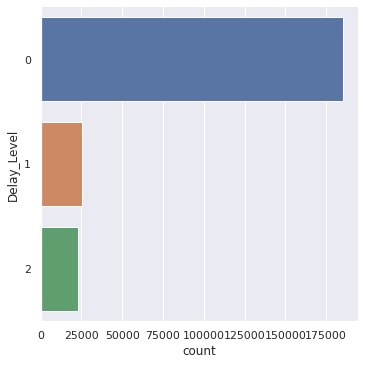

In [113]:
sb.catplot(y="Delay_Level",data =DF ,kind = 'count')

In [114]:
DF["Delay_Level"].value_counts()

0    185491
1     25222
2     23059
Name: Delay_Level, dtype: int64

In [115]:
balancinglevel = int((25222 + 23059)/2)

In [116]:
balancinglevel

24140

In [117]:
rfcdf = DF.copy()

In [118]:
rfcdf.dropna(inplace=True)
rfcdf["Delay_Level"].value_counts()

0    185491
1     25222
2     23059
Name: Delay_Level, dtype: int64

In [119]:
rfcdf_dl0 = rfcdf[rfcdf.Delay_Level == 0]
rfcdf_dlother = rfcdf[rfcdf.Delay_Level != 0]

We chose to downsample the class of small delays since the other 2 classes were relatively balanced already.

In [120]:
from sklearn.utils import resample

rfcdf_dl0_downsampled = resample(rfcdf_dl0,replace = False,n_samples =balancinglevel,random_state =300)

In [121]:
rfcdf_dl0_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24140 entries, 79293 to 188716
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24140 non-null  int64  
 1   Time_Hour_TS       24140 non-null  object 
 2   Airline            24140 non-null  object 
 3   Flight_Number      24140 non-null  int64  
 4   Tail_Number        24140 non-null  object 
 5   Departure_Time     24140 non-null  object 
 6   Departure_Delay    24140 non-null  float64
 7   Arrival_Time       24140 non-null  object 
 8   Arrival_Delay      24140 non-null  float64
 9   Origin             24140 non-null  object 
 10  Destination        24140 non-null  object 
 11  Flight_Distance    24140 non-null  int64  
 12  Flight_Duration    24140 non-null  float64
 13  Aircraft_Type      24140 non-null  object 
 14  Model              24140 non-null  object 
 15  Year_Manufactured  24140 non-null  float64
 16  Manufacturer     

In [122]:
rfcdf_downsampled = pd.concat([rfcdf_dlother, rfcdf_dl0_downsampled])
rfcdf_downsampled["Delay_Level"].value_counts()

1    25222
0    24140
2    23059
Name: Delay_Level, dtype: int64

In [123]:
rfcdf_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72421 entries, 17 to 188716
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         72421 non-null  int64  
 1   Time_Hour_TS       72421 non-null  object 
 2   Airline            72421 non-null  object 
 3   Flight_Number      72421 non-null  int64  
 4   Tail_Number        72421 non-null  object 
 5   Departure_Time     72421 non-null  object 
 6   Departure_Delay    72421 non-null  float64
 7   Arrival_Time       72421 non-null  object 
 8   Arrival_Delay      72421 non-null  float64
 9   Origin             72421 non-null  object 
 10  Destination        72421 non-null  object 
 11  Flight_Distance    72421 non-null  int64  
 12  Flight_Duration    72421 non-null  float64
 13  Aircraft_Type      72421 non-null  object 
 14  Model              72421 non-null  object 
 15  Year_Manufactured  72421 non-null  float64
 16  Manufacturer       7

<AxesSubplot:xlabel='Delay_Level', ylabel='count'>

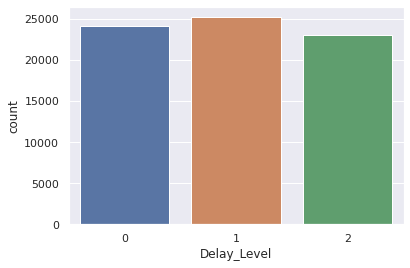

In [124]:
sb.countplot(x = "Delay_Level",data = rfcdf_downsampled)

In [125]:
catvars = rfcdf_downsampled[["Origin","Engine_Type","Manufacturer","Airline"]]
enc.fit(catvars)
catvars_enc = pd.DataFrame(enc.transform(catvars).toarray(), 
                                  columns=enc.get_feature_names(catvars.columns))

catvars_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72421 entries, 0 to 72420
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Origin_EWR                                  72421 non-null  float64
 1   Origin_JFK                                  72421 non-null  float64
 2   Origin_LGA                                  72421 non-null  float64
 3   Engine_Type_Turbo-fan                       72421 non-null  float64
 4   Engine_Type_Turbo-jet                       72421 non-null  float64
 5   Manufacturer_AIRBUS INDUSTRIE               72421 non-null  float64
 6   Manufacturer_BOEING                         72421 non-null  float64
 7   Manufacturer_BOMBARDIER INC                 72421 non-null  float64
 8   Manufacturer_CANADAIR                       72421 non-null  float64
 9   Manufacturer_EMBRAER                        72421 non-null  float64
 10  Manufactur

/home/NIHALARY001/CZ1016/base/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [126]:
catvars_enc.head()

,Origin_EWR,Origin_JFK,Origin_LGA,Engine_Type_Turbo-fan,Engine_Type_Turbo-jet,Manufacturer_AIRBUS INDUSTRIE,Manufacturer_BOEING,Manufacturer_BOMBARDIER INC,Manufacturer_CANADAIR,Manufacturer_EMBRAER,...,Airline_AirTran Airways Corporation,Airline_American Airlines Inc.,Airline_Delta Air Lines Inc.,Airline_Endeavor Air Inc.,Airline_ExpressJet Airlines Inc.,Airline_JetBlue Airways,Airline_Southwest Airlines Co.,Airline_US Airways Inc.,Airline_United Air Lines Inc.,Airline_Virgin America
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
numvars = rfcdf_downsampled[["Departure_Delay","Delay_Level","Number_of_Engines",
                             "Seats","Temperature","Humidity","Wind_Speed",
                             "Pressure","Visibility","Hour"]]

In [128]:
numvars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72421 entries, 17 to 188716
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Departure_Delay    72421 non-null  float64
 1   Delay_Level        72421 non-null  int64  
 2   Number_of_Engines  72421 non-null  int64  
 3   Seats              72421 non-null  int64  
 4   Temperature        72421 non-null  float64
 5   Humidity           72421 non-null  float64
 6   Wind_Speed         72421 non-null  float64
 7   Pressure           72421 non-null  float64
 8   Visibility         72421 non-null  float64
 9   Hour               72421 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 8.1 MB


In [134]:
numvars = numvars.reset_index()
numvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72421 entries, 0 to 72420
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              72421 non-null  int64   
 1   Departure_Delay    72421 non-null  float64 
 2   Delay_Level        72421 non-null  category
 3   Number_of_Engines  72421 non-null  int64   
 4   Seats              72421 non-null  int64   
 5   Temperature        72421 non-null  float64 
 6   Humidity           72421 non-null  float64 
 7   Wind_Speed         72421 non-null  float64 
 8   Pressure           72421 non-null  float64 
 9   Visibility         72421 non-null  float64 
 10  Hour               72421 non-null  int64   
dtypes: category(1), float64(6), int64(4)
memory usage: 5.6 MB


In [135]:
numvars.head()

,index,Departure_Delay,Delay_Level,Number_of_Engines,Seats,Temperature,Humidity,Wind_Speed,Pressure,Visibility,Hour
0,17,47.0,2,2,191,37.94,67.21,11.50780,1012.4,10.0,6
1,22,24.0,1,2,55,37.94,67.21,11.50780,1012.4,10.0,6
2,49,144.0,2,2,178,39.02,64.43,14.96014,1012.2,10.0,7
3,81,23.0,1,2,178,39.92,62.21,10.35702,1012.2,10.0,8
4,122,21.0,1,2,178,39.92,59.50,16.11092,1013.0,10.0,9


In [136]:
numvars["Delay_Level"] = numvars["Delay_Level"].astype("category")

In [137]:
numvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72421 entries, 0 to 72420
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              72421 non-null  int64   
 1   Departure_Delay    72421 non-null  float64 
 2   Delay_Level        72421 non-null  category
 3   Number_of_Engines  72421 non-null  int64   
 4   Seats              72421 non-null  int64   
 5   Temperature        72421 non-null  float64 
 6   Humidity           72421 non-null  float64 
 7   Wind_Speed         72421 non-null  float64 
 8   Pressure           72421 non-null  float64 
 9   Visibility         72421 non-null  float64 
 10  Hour               72421 non-null  int64   
dtypes: category(1), float64(6), int64(4)
memory usage: 5.6 MB


We one hot encoded our chosen categorical variables, joined it with our chosen numeric variables into a dataframe.

In [138]:
finaldf = pd.concat([catvars_enc, numvars], axis = 1).reindex(index=numvars.index)

In [139]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72421 entries, 0 to 72420
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Origin_EWR                                  72421 non-null  float64 
 1   Origin_JFK                                  72421 non-null  float64 
 2   Origin_LGA                                  72421 non-null  float64 
 3   Engine_Type_Turbo-fan                       72421 non-null  float64 
 4   Engine_Type_Turbo-jet                       72421 non-null  float64 
 5   Manufacturer_AIRBUS INDUSTRIE               72421 non-null  float64 
 6   Manufacturer_BOEING                         72421 non-null  float64 
 7   Manufacturer_BOMBARDIER INC                 72421 non-null  float64 
 8   Manufacturer_CANADAIR                       72421 non-null  float64 
 9   Manufacturer_EMBRAER                        72421 non-null  float64 
 10

In [143]:
finaldf.drop(['index'], axis=1, inplace=True)

In [144]:
finaldf.head()

,Origin_EWR,Origin_JFK,Origin_LGA,Engine_Type_Turbo-fan,Engine_Type_Turbo-jet,Manufacturer_AIRBUS INDUSTRIE,Manufacturer_BOEING,Manufacturer_BOMBARDIER INC,Manufacturer_CANADAIR,Manufacturer_EMBRAER,...,Departure_Delay,Delay_Level,Number_of_Engines,Seats,Temperature,Humidity,Wind_Speed,Pressure,Visibility,Hour
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,47.0,2,2,191,37.94,67.21,11.50780,1012.4,10.0,6
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,24.0,1,2,55,37.94,67.21,11.50780,1012.4,10.0,6
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,144.0,2,2,178,39.02,64.43,14.96014,1012.2,10.0,7
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,23.0,1,2,178,39.92,62.21,10.35702,1012.2,10.0,8
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,21.0,1,2,178,39.92,59.50,16.11092,1013.0,10.0,9


### Random Forest Classifier

We first pass our data into the model and check our results

In [145]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(finaldf["Delay_Level"])
X = pd.DataFrame(finaldf.drop(["Delay_Level","Departure_Delay"], axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state =200)

In [146]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 9)     

rfc.fit(X_train, y_train.Delay_Level.ravel())

RandomForestClassifier(max_depth=9, n_estimators=200)

Train Dataset
Accuracy  :	 0.5293012979839823



<AxesSubplot:>

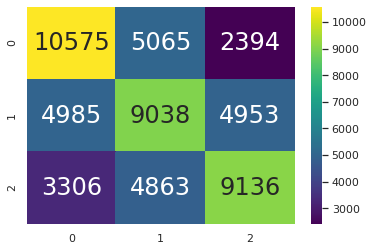

In [147]:
from sklearn.metrics import confusion_matrix

y_train_pred = rfc.predict(X_train)

print("Train Dataset")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 24},cmap="viridis")

Test Dataset
Accuracy  :	 0.48851209543797636



<AxesSubplot:>

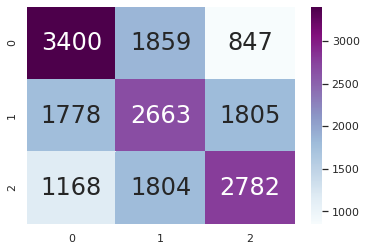

In [148]:
y_test_pred = rfc.predict(X_test)

print("Test Dataset")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 24},cmap ="BuPu")

We used grid search to find the best set of parameters

In [149]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': np.arange(100,501,100), 'max_depth': np.arange(2, 11)}

gscv = GridSearchCV(RandomForestClassifier(),param,cv = 5,scoring = 'accuracy',n_jobs = -1)

gscv.fit(X_train, y_train.Delay_Level.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

In [150]:
gscv.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=300)

In [151]:
gscv.best_score_

0.49292092423823985

After a long runtime(even with only a 10 by 5 gridsearch), we got results which were very similar to that of our model with not much improvement at all. So we decided to check another classification model, XGBoost classifier

### XGBoost Classifier

In [152]:
import xgboost as xgb

y = pd.DataFrame(finaldf["Delay_Level"].astype("int64"))
X = pd.DataFrame(finaldf.drop(["Delay_Level","Departure_Delay"], axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1000)

train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [153]:
param = {"max_depth": 15,
"eta": 0.21,
"objective":"multi:softmax",
"num_class": 3,
"min_child_weight":0}
iterations = 100

In [154]:
model = xgb.train(param, train, iterations)

[18:43:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [155]:
pred = model.predict(test)
print(pred)

[0. 1. 2. ... 1. 2. 0.]


Test Dataset accuracy
0.48089031260355686


<AxesSubplot:>

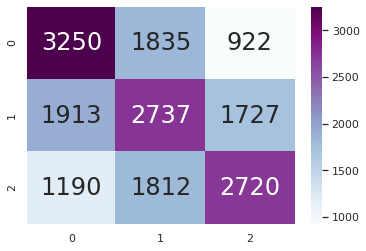

In [156]:
from sklearn.metrics import accuracy_score

print("Test Dataset accuracy")
print(accuracy_score(y_test, pred))
sb.heatmap(confusion_matrix(y_test, pred),annot = True, fmt=".0f", annot_kws={"size": 24},cmap ="BuPu")

We see that we get results which are very similar to that of a random forest. Thus, we choose XGBoost as our main model to predict delay levels, as it was much more efficient and ran way faster than a random forest

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

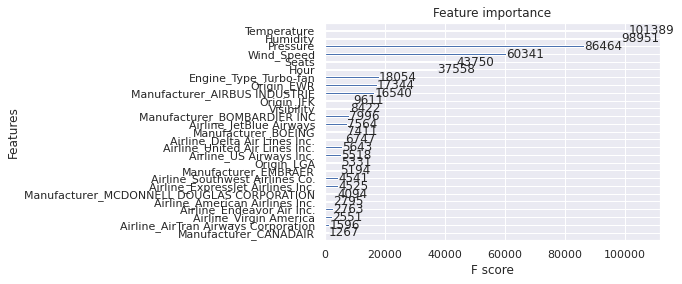

In [157]:
xgb.plot_importance(model)

Here, we can see that the weather data seems to be much more important than other features.

Adjusting the model to get class probabilities

In [164]:
param = {"max_depth": 15,
"eta": 0.21,
"objective":"multi:softprob",
"num_class": 3,
"min_child_weight":0}
iterations = 100

In [165]:
model1 = xgb.train(param,train,iterations)

[18:43:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
ypred = model1.predict(test)
ypred

array([[0.6147957 , 0.32740027, 0.05780408],
       [0.24854851, 0.4222733 , 0.32917818],
       [0.4351355 , 0.1173232 , 0.44754124],
       ...,
       [0.35002884, 0.51159   , 0.13838111],
       [0.20765755, 0.06801868, 0.72432375],
       [0.84416527, 0.15242031, 0.00341438]], dtype=float32)

In [167]:
probs = pd.DataFrame(ypred)
probs.head()

,0,1,2
0,0.614796,0.327400,0.057804
1,0.248549,0.422273,0.329178
2,0.435136,0.117323,0.447541
3,0.272963,0.620273,0.106764
4,0.074278,0.808024,0.117698


In [168]:
probs.describe()

,0,1,2
count,18106.000000,18106.000000,18106.000000
mean,0.337561,0.354743,0.307696
std,0.321469,0.275262,0.303925
min,0.000124,0.000611,0.000168
25%,0.048198,0.108173,0.057283
50%,0.223590,0.296355,0.176557
75%,0.594787,0.553824,0.507612
max,0.998888,0.986206,0.996657


We see that our tree is being built relatively evenly distributed into the 3 classes.

### Generalising to 2 classes to try to achieve better results

In [169]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233772 entries, 0 to 233771
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         233772 non-null  int64  
 1   Time_Hour_TS       233772 non-null  object 
 2   Airline            233772 non-null  object 
 3   Flight_Number      233772 non-null  int64  
 4   Tail_Number        233772 non-null  object 
 5   Departure_Time     233772 non-null  object 
 6   Departure_Delay    233772 non-null  float64
 7   Arrival_Time       233772 non-null  object 
 8   Arrival_Delay      233772 non-null  float64
 9   Origin             233772 non-null  object 
 10  Destination        233772 non-null  object 
 11  Flight_Distance    233772 non-null  int64  
 12  Flight_Duration    233772 non-null  float64
 13  Aircraft_Type      233772 non-null  object 
 14  Model              233772 non-null  object 
 15  Year_Manufactured  233772 non-null  float64
 16  Ma

In [170]:
delay_type = lambda x:(0,1)[x > 0]
DF['Delay_Level'] = DF['Departure_Delay'].apply(delay_type)

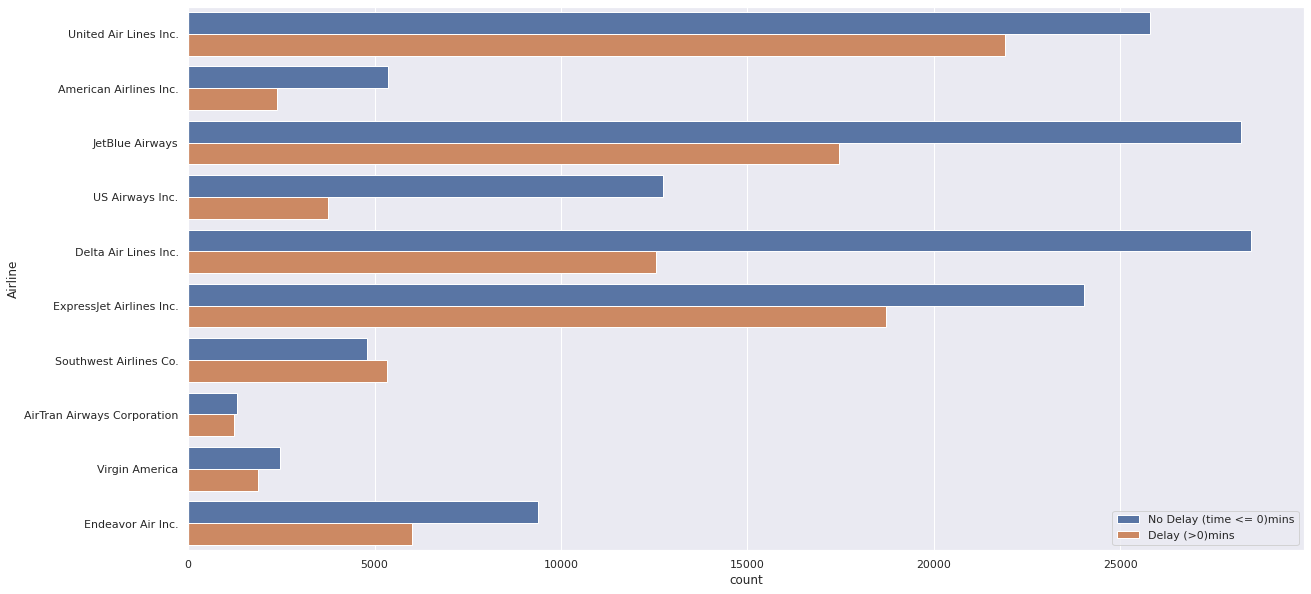

In [171]:
f = plt.figure(1, figsize=(20, 10))
sb.countplot(data = DF, y = "Airline", hue = "Delay_Level")
f = plt.legend()
f.get_texts()[0].set_text('No Delay (time <= 0)mins')
f.get_texts()[1].set_text('Delay (>0)mins')
plt.show()

In [172]:
DF["Delay_Level"].value_counts()

0    142603
1     91169
Name: Delay_Level, dtype: int64

In [173]:
rfcdf = DF.copy()

In [174]:
rfcdf_dl0 = rfcdf[rfcdf.Delay_Level == 0]
rfcdf_dlother = rfcdf[rfcdf.Delay_Level != 0]

We will have to rebalance the dataset now since our classes have changed

In [175]:
from sklearn.utils import resample
rfcdf_dl0_downsampled = resample(rfcdf_dl0,replace = False,n_samples =91169,random_state =300)
rfcdf_dl0_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91169 entries, 23238 to 218942
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         91169 non-null  int64  
 1   Time_Hour_TS       91169 non-null  object 
 2   Airline            91169 non-null  object 
 3   Flight_Number      91169 non-null  int64  
 4   Tail_Number        91169 non-null  object 
 5   Departure_Time     91169 non-null  object 
 6   Departure_Delay    91169 non-null  float64
 7   Arrival_Time       91169 non-null  object 
 8   Arrival_Delay      91169 non-null  float64
 9   Origin             91169 non-null  object 
 10  Destination        91169 non-null  object 
 11  Flight_Distance    91169 non-null  int64  
 12  Flight_Duration    91169 non-null  float64
 13  Aircraft_Type      91169 non-null  object 
 14  Model              91169 non-null  object 
 15  Year_Manufactured  91169 non-null  float64
 16  Manufacturer     

In [176]:
rfcdf_downsampled = pd.concat([rfcdf_dlother, rfcdf_dl0_downsampled])
rfcdf_downsampled["Delay_Level"].value_counts()

0    91169
1    91169
Name: Delay_Level, dtype: int64

In [177]:
rfcdf_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182338 entries, 0 to 218942
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         182338 non-null  int64  
 1   Time_Hour_TS       182338 non-null  object 
 2   Airline            182338 non-null  object 
 3   Flight_Number      182338 non-null  int64  
 4   Tail_Number        182338 non-null  object 
 5   Departure_Time     182338 non-null  object 
 6   Departure_Delay    182338 non-null  float64
 7   Arrival_Time       182338 non-null  object 
 8   Arrival_Delay      182338 non-null  float64
 9   Origin             182338 non-null  object 
 10  Destination        182338 non-null  object 
 11  Flight_Distance    182338 non-null  int64  
 12  Flight_Duration    182338 non-null  float64
 13  Aircraft_Type      182338 non-null  object 
 14  Model              182338 non-null  object 
 15  Year_Manufactured  182338 non-null  float64
 16  Ma

<AxesSubplot:xlabel='Delay_Level', ylabel='count'>

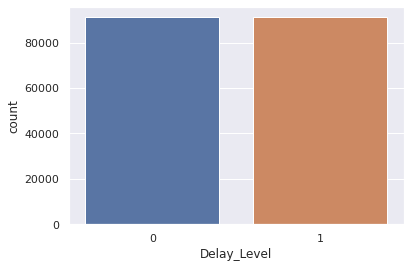

In [178]:
sb.countplot(x = "Delay_Level",data = rfcdf_downsampled)

In [179]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

catvars = rfcdf_downsampled[["Origin","Engine_Type","Manufacturer","Airline"]]
enc.fit(catvars)
catvars_enc = pd.DataFrame(enc.transform(catvars).toarray(), 
                                  columns=enc.get_feature_names(catvars.columns))

catvars_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Origin_EWR                                  182338 non-null  float64
 1   Origin_JFK                                  182338 non-null  float64
 2   Origin_LGA                                  182338 non-null  float64
 3   Engine_Type_Turbo-fan                       182338 non-null  float64
 4   Engine_Type_Turbo-jet                       182338 non-null  float64
 5   Manufacturer_AIRBUS INDUSTRIE               182338 non-null  float64
 6   Manufacturer_BOEING                         182338 non-null  float64
 7   Manufacturer_BOMBARDIER INC                 182338 non-null  float64
 8   Manufacturer_CANADAIR                       182338 non-null  float64
 9   Manufacturer_EMBRAER                        182338 non-null  float64
 

/home/NIHALARY001/CZ1016/base/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [180]:
numvars = rfcdf_downsampled[["Departure_Delay","Delay_Level","Number_of_Engines",
                             "Seats","Temperature","Humidity","Wind_Speed",
                             "Pressure","Visibility","Hour"]]

In [181]:
numvars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182338 entries, 0 to 218942
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Departure_Delay    182338 non-null  float64
 1   Delay_Level        182338 non-null  int64  
 2   Number_of_Engines  182338 non-null  int64  
 3   Seats              182338 non-null  int64  
 4   Temperature        182338 non-null  float64
 5   Humidity           182338 non-null  float64
 6   Wind_Speed         182338 non-null  float64
 7   Pressure           182338 non-null  float64
 8   Visibility         182338 non-null  float64
 9   Hour               182338 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 19.3 MB


In [183]:
numvars = numvars.reset_index()
numvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   level_0            182338 non-null  int64  
 1   index              182338 non-null  int64  
 2   Departure_Delay    182338 non-null  float64
 3   Delay_Level        182338 non-null  int64  
 4   Number_of_Engines  182338 non-null  int64  
 5   Seats              182338 non-null  int64  
 6   Temperature        182338 non-null  float64
 7   Humidity           182338 non-null  float64
 8   Wind_Speed         182338 non-null  float64
 9   Pressure           182338 non-null  float64
 10  Visibility         182338 non-null  float64
 11  Hour               182338 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 16.7 MB


In [184]:
finaldf = pd.concat([catvars_enc, numvars], axis = 1).reindex(index=numvars.index)
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Origin_EWR                                  182338 non-null  float64
 1   Origin_JFK                                  182338 non-null  float64
 2   Origin_LGA                                  182338 non-null  float64
 3   Engine_Type_Turbo-fan                       182338 non-null  float64
 4   Engine_Type_Turbo-jet                       182338 non-null  float64
 5   Manufacturer_AIRBUS INDUSTRIE               182338 non-null  float64
 6   Manufacturer_BOEING                         182338 non-null  float64
 7   Manufacturer_BOMBARDIER INC                 182338 non-null  float64
 8   Manufacturer_CANADAIR                       182338 non-null  float64
 9   Manufacturer_EMBRAER                        182338 non-null  float64
 

In [185]:
finaldf.drop(['index', 'level_0'], axis=1, inplace=True)

In [186]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [187]:
y = pd.DataFrame(finaldf["Delay_Level"])
X = pd.DataFrame(finaldf.drop(["Delay_Level","Departure_Delay"], axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1000)

In [188]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [189]:
param = {"max_depth": 15,
"eta": 0.15,
"objective":"multi:softmax",
"num_class": 2,
"min_child_weight":0}
iterations = 100

In [190]:
model = xgb.train(param, train, iterations)

[18:47:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [191]:
pred = model.predict(test)
pred

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [192]:
accuracy_score(y_test,pred)

0.6542722386750027

Test Dataset accuracy
0.6542722386750027




<AxesSubplot:>

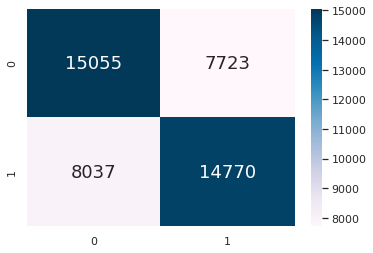

In [193]:
print("Test Dataset accuracy")
print(accuracy_score(y_test, pred))
print('\n')
sb.heatmap(confusion_matrix(y_test, pred), annot = True, fmt=".0f", annot_kws={"size": 18},cmap ="PuBu")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

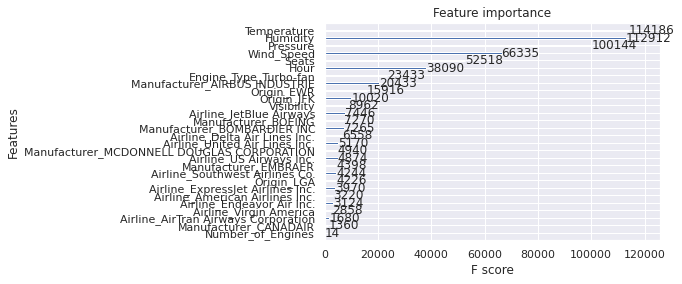

In [194]:
xgb.plot_importance(model)

We see that our accuracy has improve to about 65%.

We next adjusted the model again to predict the probabilities

In [195]:
model2 = xgb.XGBClassifier()
model2.fit(X_train,y_train.Delay_Level.ravel())

/home/NIHALARY001/CZ1016/base/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Test Dataset accuracy
0.6623450696501042


<AxesSubplot:>

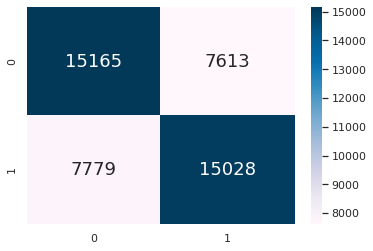

In [196]:
ypred = model2.predict(X_test)
print("Test Dataset accuracy")
print(accuracy_score(y_test, ypred))
sb.heatmap(confusion_matrix(y_test,ypred), 
        annot = True, fmt=".0f", annot_kws={"size": 18},cmap ="PuBu")

In [197]:
probs = pd.DataFrame((model2.predict_proba(X_test)))
probs.describe()

,0,1
count,45585.000000,45585.000000
mean,0.500473,0.499527
std,0.202511,0.202511
min,0.008302,0.025834
25%,0.346850,0.341188
50%,0.501851,0.498149
75%,0.658812,0.653150
max,0.974166,0.991698


We see that our model is being built evenly into the 2 classes.